In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# **Installation of PySpark**

---


In [2]:
!sudo apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://mirrors.estointernet.in/apache/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [3]:
# Using operating system dependent functionality to read or write a file - configuring the path
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()

In [4]:
# Initiating the SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Group ID').getOrCreate()


# **Loading the Dataset**

---


In [5]:
# Loading date wise dataset files
dataframe1 = spark.read.load("/content/drive/MyDrive/IDS2018/02-14-2018.csv", format="csv", inferSchema=True, header=True)
dataframe2 = spark.read.load("/content/drive/MyDrive/IDS2018/02-15-2018.csv", format="csv", inferSchema=True, header=True)
dataframe3 = spark.read.load("/content/drive/MyDrive/IDS2018/02-16-2018.csv", format="csv", inferSchema=True, header=True)
dataframe4 = spark.read.load("/content/drive/MyDrive/IDS2018/02-21-2018.csv", format="csv", inferSchema=True, header=True)
dataframe5 = spark.read.load("/content/drive/MyDrive/IDS2018/02-22-2018.csv", format="csv", inferSchema=True, header=True)
dataframe6 = spark.read.load("/content/drive/MyDrive/IDS2018/02-23-2018.csv", format="csv", inferSchema=True, header=True)
dataframe7 = spark.read.load("/content/drive/MyDrive/IDS2018/02-28-2018.csv", format="csv", inferSchema=True, header=True)
dataframe8 = spark.read.load("/content/drive/MyDrive/IDS2018/03-01-2018.csv", format="csv", inferSchema=True, header=True)
dataframe9 = spark.read.load("/content/drive/MyDrive/IDS2018/03-02-2018.csv", format="csv", inferSchema=True, header=True)

In [6]:
from functools import reduce
from pyspark.sql import DataFrame

# Creating dataframes
dataframes = [dataframe1, dataframe2, dataframe3, dataframe4, dataframe5, dataframe6, dataframe7, dataframe8, dataframe9]

# accumulating the dataframes
IDS2018_dataframe = reduce(DataFrame.unionAll, dataframes)

In [7]:
# examining the DataFrame
IDS2018_dataframe.show(100)

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+----------------+----------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------------+----------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--

In [8]:
dataframes

[DataFrame[Dst Port: int, Protocol: int, Timestamp: string, Flow Duration: bigint, Tot Fwd Pkts: int, Tot Bwd Pkts: int, TotLen Fwd Pkts: int, TotLen Bwd Pkts: int, Fwd Pkt Len Max: int, Fwd Pkt Len Min: int, Fwd Pkt Len Mean: double, Fwd Pkt Len Std: double, Bwd Pkt Len Max: int, Bwd Pkt Len Min: int, Bwd Pkt Len Mean: double, Bwd Pkt Len Std: double, Flow Byts/s: double, Flow Pkts/s: double, Flow IAT Mean: double, Flow IAT Std: double, Flow IAT Max: bigint, Flow IAT Min: bigint, Fwd IAT Tot: bigint, Fwd IAT Mean: double, Fwd IAT Std: double, Fwd IAT Max: bigint, Fwd IAT Min: bigint, Bwd IAT Tot: int, Bwd IAT Mean: double, Bwd IAT Std: double, Bwd IAT Max: int, Bwd IAT Min: int, Fwd PSH Flags: int, Bwd PSH Flags: int, Fwd URG Flags: int, Bwd URG Flags: int, Fwd Header Len: int, Bwd Header Len: int, Fwd Pkts/s: double, Bwd Pkts/s: double, Pkt Len Min: int, Pkt Len Max: int, Pkt Len Mean: double, Pkt Len Std: double, Pkt Len Var: double, FIN Flag Cnt: int, SYN Flag Cnt: int, RST Flag Cn

In [9]:
IDS2018_dataframe.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Flow Duration: long (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: double (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: double (nullable = true)
 |-- Flow IAT Min: double (nullable = true)


# PySpark SQL 

---



In [10]:
# Creating Spark View
from pyspark.sql import functions as F
# Removing spaces between feature names
IDS2018_dataframe = IDS2018_dataframe.select([F.col(col).alias(col.replace(' ', '_').replace('/','')) for col in IDS2018_dataframe.columns])
IDS2018_dataframe.createOrReplaceTempView('IDS2018_dataframe')

In [11]:
# getting modified print schema
IDS2018_dataframe.printSchema()

root
 |-- Dst_Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Flow_Duration: long (nullable = true)
 |-- Tot_Fwd_Pkts: integer (nullable = true)
 |-- Tot_Bwd_Pkts: integer (nullable = true)
 |-- TotLen_Fwd_Pkts: integer (nullable = true)
 |-- TotLen_Bwd_Pkts: double (nullable = true)
 |-- Fwd_Pkt_Len_Max: integer (nullable = true)
 |-- Fwd_Pkt_Len_Min: integer (nullable = true)
 |-- Fwd_Pkt_Len_Mean: double (nullable = true)
 |-- Fwd_Pkt_Len_Std: double (nullable = true)
 |-- Bwd_Pkt_Len_Max: integer (nullable = true)
 |-- Bwd_Pkt_Len_Min: integer (nullable = true)
 |-- Bwd_Pkt_Len_Mean: double (nullable = true)
 |-- Bwd_Pkt_Len_Std: double (nullable = true)
 |-- Flow_Bytss: double (nullable = true)
 |-- Flow_Pktss: double (nullable = true)
 |-- Flow_IAT_Mean: double (nullable = true)
 |-- Flow_IAT_Std: double (nullable = true)
 |-- Flow_IAT_Max: double (nullable = true)
 |-- Flow_IAT_Min: double (nullable = true)
 

In [12]:
# Query1
query1dataframe = IDS2018_dataframe.groupby('Label').count().show()

+--------------------+-------+
|               Label|  count|
+--------------------+-------+
|      SSH-Bruteforce| 187589|
|               Label|     46|
|       Infilteration| 161934|
|                   0|      1|
|       SQL Injection|     87|
|DoS attacks-Slowl...|  10990|
|              Benign|6112146|
|DoS attacks-SlowH...| 139890|
|                 Bot| 286191|
|DoS attacks-Golde...|  41508|
|    Brute Force -XSS|    230|
|      FTP-BruteForce| 193360|
|DDOS attack-LOIC-UDP|   1730|
|    DoS attacks-Hulk| 461912|
|    Brute Force -Web|    611|
|    DDOS attack-HOIC| 686012|
+--------------------+-------+



In [13]:
# Query2
# get the value count using the sql query
query2 = spark.sql(" SELECT Dst_Port, count(*) as freq from IDS2018_dataframe GROUP BY Dst_Port ")

# view the results
query2.show()

+--------+----+
|Dst_Port|freq|
+--------+----+
|   38422|  30|
|   40386|  36|
|   35982|  39|
|    3997|   5|
|    1829|   3|
|   51415| 183|
|   26706|   4|
|   15846|   3|
|   51607| 170|
|   49308|  57|
|   50348| 193|
|   49855| 196|
|   50353| 179|
|   51393| 184|
|   51123| 181|
|   51595| 165|
|   63964|  25|
|   64519|  26|
|   57020|  69|
|   50223| 197|
+--------+----+
only showing top 20 rows



In [14]:
# Query3
# get the value count using the sql query
query3 = spark.sql(" SELECT Protocol, count(*) as distinct from IDS2018_dataframe GROUP BY Protocol ")

# view the results
query3.show()

+--------+--------+
|Protocol|distinct|
+--------+--------+
|    null|      46|
|       6| 6504689|
|      17| 1685321|
|       0|   94181|
+--------+--------+



+-----------------+-----+
|Fwd_Act_Data_Pkts|count|
+-----------------+-----+
|           150604|    1|
|           111515|    1|
|            93341|    1|
|             1088|    1|
|             1591|    1|
|              148|    3|
|           103388|    1|
|           123110|    1|
|           156661|    1|
|           117374|    1|
|           122992|    1|
|           118064|    1|
|           108738|    1|
|           127584|    1|
|           124225|    1|
|           116319|    1|
|           127737|    1|
|           100220|    1|
|              858|    1|
|              392|    1|
|               31|  409|
|           103918|    1|
|           139564|    1|
|           119777|    1|
|           114680|    1|
|               85|   22|
|           138038|    1|
|           113570|    1|
|           126111|    1|
|           138520|    1|
|           131964|    1|
|           127475|    1|
|            73289|    1|
|           138974|    1|
|           137548|    1|
|           

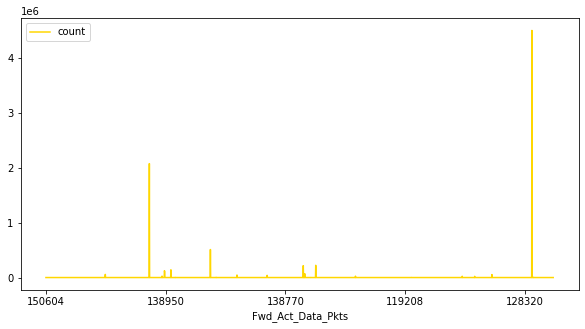

In [15]:
# Query4
query4 = spark.sql('''
SELECT RIGHT(Fwd_Act_Data_Pkts,100) as Fwd_Act_Data_Pkts, COUNT(*) as count 
FROM IDS2018_dataframe
GROUP BY Fwd_Act_Data_Pkts
''')
query4.show(100)
#Ploting the above query
query4dataframe = query4.toPandas()
query4dataframe.plot.line (x='Fwd_Act_Data_Pkts',y='count',c='Gold',figsize=(10,5))

In [16]:
# Query5
query5 = spark.sql("""
                      SELECT Fwd_IAT_Max, Flow_Duration 
                      FROM IDS2018_dataframe 
                      WHERE Protocol = '0' AND Dst_Port = 0
                    """)
query5.show()

+-----------+-------------+
|Fwd_IAT_Max|Flow_Duration|
+-----------+-------------+
|5.6320958E7|    112641719|
|5.6320814E7|    112641466|
|5.6319525E7|    112638623|
|5.6320384E7|    112640480|
|5.6320666E7|    112641244|
|5.6320249E7|    112640196|
|5.6320309E7|    112640430|
|5.6320484E7|    112640904|
|5.6320589E7|    112641065|
|5.6320778E7|    112641155|
|5.6320718E7|    112641311|
|5.6320506E7|    112640750|
| 5.632039E7|    112640660|
|5.6320359E7|    112640642|
|5.6320508E7|    112640974|
|5.6320668E7|    112641062|
|5.6320567E7|    112641124|
|5.6320684E7|    112641151|
|5.6320789E7|    112641308|
|5.6320648E7|    112641033|
+-----------+-------------+
only showing top 20 rows



In [17]:
# Query6 :  Counting w.r.t Timestamp
counting = spark.sql('''
SELECT RIGHT(Timestamp,100) as timestamp, COUNT(*) as count 
FROM IDS2018_dataframe
GROUP BY timestamp
''')
counting.show(100)
'''#Ploting the above query
countingdataframe = counting.toPandas()
countingdataframe.plot.bar(x='timestamp',y='count',figsize=(100,5))'''

+-------------------+-----+
|          timestamp|count|
+-------------------+-----+
|14/02/2018 10:38:42|   38|
|14/02/2018 10:44:39|   38|
|14/02/2018 10:45:51|   94|
|14/02/2018 10:50:07|   96|
|14/02/2018 10:50:54|   44|
|14/02/2018 10:54:05|   76|
|14/02/2018 10:55:01|   83|
|14/02/2018 10:57:28|   65|
|14/02/2018 10:57:43|   71|
|14/02/2018 11:02:23|   46|
|14/02/2018 11:02:30|   46|
|14/02/2018 11:16:50|  100|
|14/02/2018 11:20:20|   46|
|14/02/2018 11:22:31|   62|
|14/02/2018 11:27:03|   53|
|14/02/2018 11:30:33|   49|
|14/02/2018 11:30:55|   71|
|14/02/2018 11:32:59|   26|
|14/02/2018 11:34:48|   74|
|14/02/2018 11:35:32|   62|
|14/02/2018 11:37:08|   57|
|14/02/2018 11:44:25|   42|
|14/02/2018 11:48:34|   57|
|14/02/2018 11:48:36|   37|
|14/02/2018 11:55:26|   35|
|14/02/2018 11:56:09|   34|
|14/02/2018 02:03:58|   47|
|14/02/2018 02:07:35|   37|
|14/02/2018 02:08:12|   84|
|14/02/2018 02:18:09|   46|
|14/02/2018 02:19:42|   53|
|14/02/2018 02:21:28|   72|
|14/02/2018 02:21:45

"#Ploting the above query\ncountingdataframe = counting.toPandas()\ncountingdataframe.plot.bar(x='timestamp',y='count',figsize=(100,5))"

In [18]:
# Query7 : 
query7 = spark.sql(''' 
                      select Flow_Pktss, Fwd_IAT_Max 
                      from IDS2018_dataframe 
                      order by Label
                  ''')
query7.show()

+----------------+-----------+
|      Flow_Pktss|Fwd_IAT_Max|
+----------------+-----------+
|     0.402060156|  4974380.0|
|    0.0226099594|8.8456594E7|
| 7246.3768115942|        0.0|
| 2111.9324181626|        0.0|
| 1392.7576601671|        0.0|
|  754.1478129713|        0.0|
|     0.022607754|8.8465223E7|
|33333.3333333333|        0.0|
|   58.3660426364|    68221.0|
|    6.7265543546|  1181123.0|
|76923.0769230769|        0.0|
|    4.7193010311|  1316090.0|
|  800.6405124099|        0.0|
|   113.010312191|    28148.0|
|46511.6279069767|       43.0|
|45454.5454545455|        0.0|
|    2.8507192365|  3014708.0|
| 1960.7843137255|        0.0|
|  587.0267097153|        0.0|
|    5.0562787907|  1345706.0|
+----------------+-----------+
only showing top 20 rows



In [19]:
# Query8 : 
query8 = spark.sql(''' 
                      select Fwd_Pktss, Fwd_IAT_Max 
                      from IDS2018_dataframe 
                      where Dst_Port = '80'
                  ''')
query8.show()

+-------------+-----------+
|    Fwd_Pktss|Fwd_IAT_Max|
+-------------+-----------+
|10.4928931635|   238470.0|
| 10.525252185|   237853.0|
|10.5279559342|   237497.0|
|10.4718401746|   238515.0|
| 9.7511886699|   256523.0|
|10.4885349824|   238274.0|
| 10.490625577|   237558.0|
|10.4786434767|   238719.0|
| 10.533633893|   236894.0|
|10.4908016651|   238349.0|
|10.4329899489|   239270.0|
|10.5049299636|   237904.0|
|10.4752846135|   238694.0|
| 9.7644235182|   255771.0|
|10.4868191171|   238389.0|
| 9.4195130865|   265301.0|
|10.4600978647|   239088.0|
|10.4689678854|   238692.0|
|10.5434072075|   237325.0|
|10.2785275393|   243842.0|
+-------------+-----------+
only showing top 20 rows



In [20]:
# Query9 : 
query9 = spark.sql(''' 
                      select Flow_Duration, Bwd_Pkt_Len_Std 
                      from IDS2018_dataframe 
                      where Label <>  'FTP-BruteForce'
                  ''')
query9.show()

+-------------+---------------+
|Flow_Duration|Bwd_Pkt_Len_Std|
+-------------+---------------+
|    112641719|            0.0|
|    112641466|            0.0|
|    112638623|            0.0|
|      6453966| 371.6778922072|
|      8804066| 362.2498635422|
|      6989341| 347.6425694023|
|    112640480|            0.0|
|    112641244|            0.0|
|       476513| 267.3131746348|
|       475048| 272.5093270575|
|       474926| 272.5093270575|
|       477471| 266.1584740964|
|       512758| 267.3131746348|
|       476711| 264.4264232888|
|       476616| 267.3131746348|
|       477161| 267.3131746348|
|       474670| 269.0452254424|
|       476608| 266.1584740964|
|       479249| 269.6225757116|
|       475967| 269.6225757116|
+-------------+---------------+
only showing top 20 rows



In [21]:
# Query10 : 
query10 = spark.sql(''' 
                      select Subflow_Fwd_Pkts, Pkt_Size_Avg 
                      from IDS2018_dataframe 
                      where Bwd_Pkt_Len_Max between 1000 and 1500
                  ''')
query10.show()

+----------------+---------------+
|Subflow_Fwd_Pkts|   Pkt_Size_Avg|
+----------------+---------------+
|             975|2341.2256114317|
|            1038| 2300.639828234|
|            1041|2365.8398018167|
|             555| 2522.136437247|
|               9|        270.375|
|               9|          257.5|
|               9|       311.5625|
|               8|       474.9375|
|              21| 540.2363636364|
|              12| 418.6956521739|
|              13| 160.5769230769|
|               9| 523.5789473684|
|              19| 395.8139534884|
|              28| 541.8191489362|
|               8|          423.2|
|              51|  823.652173913|
|              13| 240.6153846154|
|              14| 216.4444444444|
|              13|         172.96|
|              13|          207.8|
+----------------+---------------+
only showing top 20 rows



In [22]:
# Query11 : 
query11 = spark.sql(''' 
                      select Label, Protocol
                      from IDS2018_dataframe 
                      where Label like 'SSH-Bruteforce'
                  ''')
query11.show()

'''#plotting query 11 
query11dataframe = query11.toPandas()
query11dataframe.plot.bar(x='Label',logy=True,figsize=(10,5))'''

+--------------+--------+
|         Label|Protocol|
+--------------+--------+
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
|SSH-Bruteforce|       6|
+--------------+--------+
only showing top 20 rows



"#plotting query 11 \nquery11dataframe = query11.toPandas()\nquery11dataframe.plot.bar(x='Label',logy=True,figsize=(10,5))"

In [23]:
# Query12 : 
query12 = spark.sql(''' 
                      select Label, Protocol,
                      case when Pkt_Size_Avg > 100 then
                      'considerable' else
                      'negligible' end Pkt_Size_Avg
                      from IDS2018_dataframe 
                    ''')
query12.show()
'''#plotting query 12 
query12dataframe = query12.toPandas()
query12dataframe.plot.bar(x='Label',y='Pkt_Size_Avg',logy=True,figsize=(10,5))'''

+------+--------+------------+
| Label|Protocol|Pkt_Size_Avg|
+------+--------+------------+
|Benign|       0|  negligible|
|Benign|       0|  negligible|
|Benign|       0|  negligible|
|Benign|       6|considerable|
|Benign|       6|considerable|
|Benign|       6|considerable|
|Benign|       0|  negligible|
|Benign|       0|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
|Benign|       6|  negligible|
+------+--------+------------+
only showing top 20 rows



"#plotting query 12 \nquery12dataframe = query12.toPandas()\nquery12dataframe.plot.bar(x='Label',y='Pkt_Size_Avg',logy=True,figsize=(10,5))"

+-----------------+---------------------+---------------------+
|max(Pkt_Size_Avg)|max(Fwd_Seg_Size_Avg)|max(Bwd_Seg_Size_Avg)|
+-----------------+---------------------+---------------------+
|      17478.40769|     16529.3138401559|          33879.28358|
|             null|                 null|                 null|
+-----------------+---------------------+---------------------+



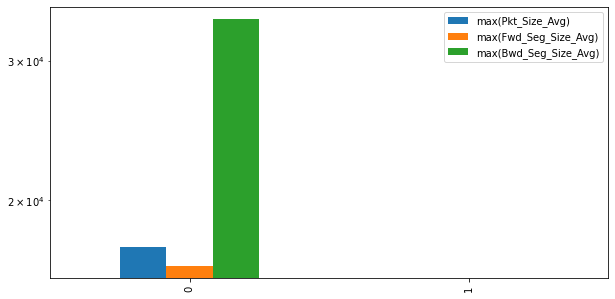

In [24]:
# Query13 : 
query13 = spark.sql('''
(
  SELECT max(Pkt_Size_Avg), max(Fwd_Seg_Size_Avg), max(Bwd_Seg_Size_Avg) 
  FROM IDS2018_dataframe 
  WHERE Label != "DDOS attack"
)
UNION ALL
(
  SELECT max(Pkt_Size_Avg), max(Fwd_Seg_Size_Avg), max(Bwd_Seg_Size_Avg) 
  FROM IDS2018_dataframe 
  WHERE Label = "DDOS attack"
)
''')
query13.show()

query13dataframe = query13.toPandas()
query13dataframe.plot.bar(logy=True,figsize=(10,5))

+--------------------+-------------------------------------+
|               Label|stddev(CAST(Flow_Duration AS DOUBLE))|
+--------------------+-------------------------------------+
|      SSH-Bruteforce|                   184682.80800469534|
|               Label|                                 null|
|       Infilteration|                 3.1323901831563447E7|
|                   0|                                 null|
|       SQL Injection|                     2892603.93479093|
|DoS attacks-Slowl...|                  4.824123361388482E7|
|              Benign|                  8.041731140805975E8|
|DoS attacks-SlowH...|                    6.437453371607073|
|                 Bot|                     2485232.90022666|
|DoS attacks-Golde...|                  1.713644153030773E7|
|    Brute Force -XSS|                 2.9463155858369075E7|
|      FTP-BruteForce|                    5.831353145458439|
|DDOS attack-LOIC-UDP|                 1.6794194753598668E7|
|    DoS attacks-Hulk|  

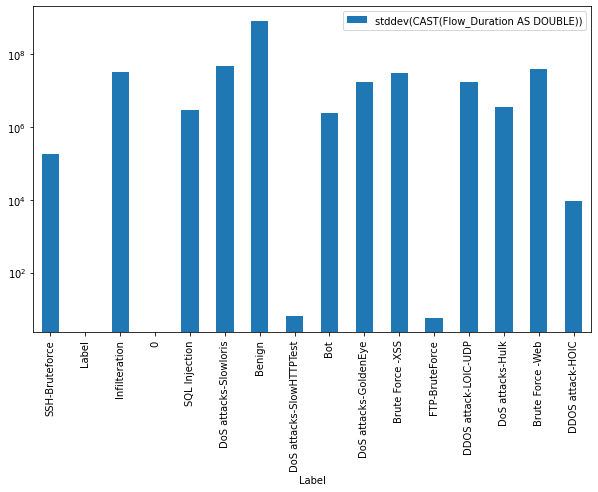

In [25]:
# Query14 : 
query14 = spark.sql('''
SELECT Label, stddev(Flow_Duration)
FROM IDS2018_dataframe
GROUP BY Label
''')
query14.show()

query14dataframe = query14.toPandas()
query14dataframe.plot.bar(x='Label',logy=True,figsize=(10,6))

+---------------+-----+
|TotLen_Fwd_Pkts|count|
+---------------+-----+
|           6397|    1|
|        3837696|    1|
|        3611872|    1|
|        3403008|    1|
|           7993|    1|
|        4069376|    1|
|          15619|    1|
|        3761632|    1|
|        3638464|    1|
|        3494464|    1|
+---------------+-----+



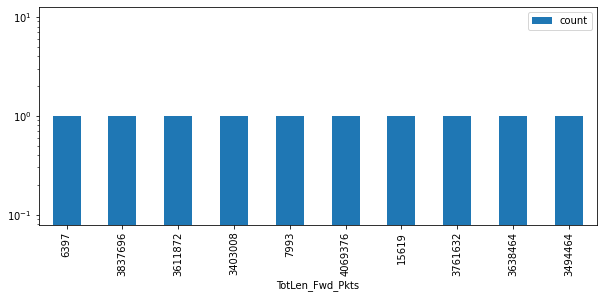

In [26]:
# Query15 : 
query15 = spark.sql('''
SELECT TotLen_Fwd_Pkts,COUNT(*) AS count
FROM IDS2018_dataframe 
GROUP BY TotLen_Fwd_Pkts
ORDER BY count asc
LIMIT 10
''')
query15.show()

#plotting query15 
query15dataframe = query15.toPandas()
query15dataframe.plot.bar(x='TotLen_Fwd_Pkts',logy=True,figsize=(10,4))


# **PySpark programming Section_1 of Task_2**

---


In [27]:
from pyspark.sql.functions import skewness, kurtosis
from pyspark.sql.functions import var_pop, var_samp, stddev, stddev_pop, sumDistinct, ntile
from pyspark.sql import Row
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pandas as pd
from pyspark.mllib.stat import Statistics
from pyspark.mllib.stat.test import ChiSqTestResult
from pyspark.sql.functions import when
from pyspark.mllib.linalg import *

In [28]:
#query16 description of each column
for col in IDS2018_dataframe.columns:
     IDS2018_dataframe.describe([col]).show()

+-------+-----------------+
|summary|         Dst_Port|
+-------+-----------------+
|  count|          8284191|
|   mean|10891.25115415615|
| stddev| 20229.5535671617|
|    min|                0|
|    max|            65535|
+-------+-----------------+



KeyboardInterrupt: ignored

In [29]:
#query17 Count the value of null in every column
for col in IDS2018_dataframe.columns:
    print(col, "\t", "with null values: ", IDS2018_dataframe.filter(IDS2018_dataframe[col].isNull()).count())

Dst_Port 	 with null values:  46
Protocol 	 with null values:  46
Timestamp 	 with null values:  0


KeyboardInterrupt: ignored

In [30]:
#query18 check unique values for class
IDS2018_dataframe.select('Label').distinct().rdd.map(lambda r: r[0]).collect()

['SSH-Bruteforce',
 'Label',
 'Infilteration',
 '0',
 'SQL Injection',
 'DoS attacks-Slowloris',
 'Benign',
 'DoS attacks-SlowHTTPTest',
 'Bot',
 'DoS attacks-GoldenEye',
 'Brute Force -XSS',
 'FTP-BruteForce',
 'DDOS attack-LOIC-UDP',
 'DoS attacks-Hulk',
 'Brute Force -Web',
 'DDOS attack-HOIC']

In [31]:
#query19 calculating covariance
print(IDS2018_dataframe.cov('Bwd_Pkt_Len_Max','Fwd_Pkt_Len_Max'))

94340.07935402528


In [32]:
#query20 calculating correlation
print(IDS2018_dataframe.corr('Flow_IAT_Mean','Bwd_IAT_Mean'))

0.0019128983469576231


In [33]:
#query21 aggregation function
print("Average Fwd_IAT_Tot: {}".format(IDS2018_dataframe.agg({'Fwd_IAT_Tot': 'mean'})\
      .collect()[0][0]))

Average Fwd_IAT_Tot: 9884853.041626394


In [34]:
#query22 calculating standard deviation
print("Standard deviation of Fwd_IAT_Tot: {}"\
      .format(IDS2018_dataframe.agg({'Fwd_IAT_Tot': 'stddev'}).collect()[0][0]))

Standard deviation of Fwd_IAT_Tot: 690792048.817246


In [35]:
#query23 calculating Max Value
print("Max Fwd_IAT_Tot: {}"\
      .format(IDS2018_dataframe.agg({'Fwd_IAT_Tot': 'max'}).collect()[0][0]))

Max Fwd_IAT_Tot: 120000000.0


In [36]:
#query24 calculating Min Value
print("Min Fwd_IAT_Tot: {}".format(IDS2018_dataframe.agg({'Fwd_IAT_Tot': 'min'})\
      .collect()[0][0]))

Min Fwd_IAT_Tot: -919011000000.0


In [37]:
#query25 calculating Skewness
IDS2018_dataframe.select(skewness("Tot_Fwd_Pkts")).show(truncate=False)

+----------------------+
|skewness(Tot_Fwd_Pkts)|
+----------------------+
|74.58269626691875     |
+----------------------+



In [38]:
#query26 calculating Variance
IDS2018_dataframe.select(var_samp("Fwd_IAT_Tot")).show(truncate=False)

+---------------------+
|var_samp(Fwd_IAT_Tot)|
+---------------------+
|4.7719365470912826E17|
+---------------------+



In [39]:
#query27 kurtosis function
IDS2018_dataframe.select(kurtosis("Fwd_Header_Len")).show(truncate=False)

+------------------------+
|kurtosis(Fwd_Header_Len)|
+------------------------+
|5893.965914377103       |
+------------------------+



In [40]:
#query28 calculating sum distinct 
IDS2018_dataframe.select(sumDistinct("Subflow_Fwd_Pkts")).show(truncate=False)

+------------------------------+
|sum(DISTINCT Subflow_Fwd_Pkts)|
+------------------------------+
|204686982                     |
+------------------------------+



In [41]:
#query29 calculating stddev_pop
IDS2018_dataframe.select(stddev_pop("Subflow_Fwd_Pkts")).show(truncate=False)

+----------------------------+
|stddev_pop(Subflow_Fwd_Pkts)|
+----------------------------+
|1745.9064526129819          |
+----------------------------+



In [42]:
#query30 calculating Var_pop
IDS2018_dataframe.select(var_pop("Fwd_IAT_Tot")).show(truncate=False)

+---------------------+
|var_pop(Fwd_IAT_Tot) |
+---------------------+
|4.7719359710620064E17|
+---------------------+




# **PySpark Machine Learning Programming Section_2 of Task_2**

---


# **Linear** **Regression** **Model**

In [208]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('IDS2018').getOrCreate()

In [209]:
from pyspark.ml.regression import LinearRegression

In [210]:
dataset=spark.read.csv("/content/drive/MyDrive/IDS2018/02-15-2018.csv",inferSchema=True,header=True)

In [211]:
dataset

DataFrame[Dst Port: int, Protocol: int, Timestamp: string, Flow Duration: int, Tot Fwd Pkts: int, Tot Bwd Pkts: int, TotLen Fwd Pkts: int, TotLen Bwd Pkts: int, Fwd Pkt Len Max: int, Fwd Pkt Len Min: int, Fwd Pkt Len Mean: double, Fwd Pkt Len Std: double, Bwd Pkt Len Max: int, Bwd Pkt Len Min: int, Bwd Pkt Len Mean: double, Bwd Pkt Len Std: double, Flow Byts/s: double, Flow Pkts/s: double, Flow IAT Mean: double, Flow IAT Std: double, Flow IAT Max: int, Flow IAT Min: int, Fwd IAT Tot: int, Fwd IAT Mean: double, Fwd IAT Std: double, Fwd IAT Max: int, Fwd IAT Min: int, Bwd IAT Tot: int, Bwd IAT Mean: double, Bwd IAT Std: double, Bwd IAT Max: int, Bwd IAT Min: int, Fwd PSH Flags: int, Bwd PSH Flags: int, Fwd URG Flags: int, Bwd URG Flags: int, Fwd Header Len: int, Bwd Header Len: int, Fwd Pkts/s: double, Bwd Pkts/s: double, Pkt Len Min: int, Pkt Len Max: int, Pkt Len Mean: double, Pkt Len Std: double, Pkt Len Var: double, FIN Flag Cnt: int, SYN Flag Cnt: int, RST Flag Cnt: int, PSH Flag Cn

In [212]:
dataset.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+----------------+----------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------------+-------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+------

In [213]:
dataset.printSchema()

root
 |-- Dst Port: integer (nullable = true)
 |-- Protocol: integer (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- Flow Duration: integer (nullable = true)
 |-- Tot Fwd Pkts: integer (nullable = true)
 |-- Tot Bwd Pkts: integer (nullable = true)
 |-- TotLen Fwd Pkts: integer (nullable = true)
 |-- TotLen Bwd Pkts: integer (nullable = true)
 |-- Fwd Pkt Len Max: integer (nullable = true)
 |-- Fwd Pkt Len Min: integer (nullable = true)
 |-- Fwd Pkt Len Mean: double (nullable = true)
 |-- Fwd Pkt Len Std: double (nullable = true)
 |-- Bwd Pkt Len Max: integer (nullable = true)
 |-- Bwd Pkt Len Min: integer (nullable = true)
 |-- Bwd Pkt Len Mean: double (nullable = true)
 |-- Bwd Pkt Len Std: double (nullable = true)
 |-- Flow Byts/s: double (nullable = true)
 |-- Flow Pkts/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: integer (nullable = true)
 |-- Flow IAT Min: integer (nullable =

In [214]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [215]:
featureassembler=VectorAssembler(inputCols=["Active Mean","Fwd Header Len","Flow IAT Min","Fwd Pkt Len Mean"],outputCol="Independent Features")

In [216]:
output=featureassembler.transform(dataset)

In [217]:
output.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+----------------+----------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------------+-------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+------

In [218]:
output.select("Independent Features").show()

+--------------------+
|Independent Features|
+--------------------+
|(4,[2],[5.6320081...|
|[1024353.0,456.0,...|
|[0.0,64.0,543.0,3...|
|(4,[2],[5.6320092...|
|(4,[2],[5.6319928...|
|(4,[2],[5.6320316...|
|[0.0,104.0,23.0,6...|
| [0.0,64.0,14.0,0.0]|
|(4,[2],[5.6320776...|
|[2726234.0,552.0,...|
|(4,[2],[5.6319824...|
|[0.0,1140.0,1.0,8...|
| (4,[2],[5.63201E7])|
|(4,[2],[5.6320392...|
|[0.0,168.0,23.0,2...|
|[566916.5,392.0,1...|
|[0.0,96.0,58.0,21...|
|(4,[2],[5.6320551...|
|(4,[2],[5.6320639...|
|(4,[2],[5.6320684...|
+--------------------+
only showing top 20 rows



In [219]:
output.columns

['Dst Port',
 'Protocol',
 'Timestamp',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd B

In [220]:
finalized_data=output.select("Independent Features","Dst Port")

In [221]:
finalized_data.show()

+--------------------+--------+
|Independent Features|Dst Port|
+--------------------+--------+
|(4,[2],[5.6320081...|       0|
|[1024353.0,456.0,...|      22|
|[0.0,64.0,543.0,3...|   47514|
|(4,[2],[5.6320092...|       0|
|(4,[2],[5.6319928...|       0|
|(4,[2],[5.6320316...|       0|
|[0.0,104.0,23.0,6...|      80|
| [0.0,64.0,14.0,0.0]|      80|
|(4,[2],[5.6320776...|       0|
|[2726234.0,552.0,...|      22|
|(4,[2],[5.6319824...|       0|
|[0.0,1140.0,1.0,8...|    1178|
| (4,[2],[5.63201E7])|       0|
|(4,[2],[5.6320392...|       0|
|[0.0,168.0,23.0,2...|      80|
|[566916.5,392.0,1...|      22|
|[0.0,96.0,58.0,21...|   50742|
|(4,[2],[5.6320551...|       0|
|(4,[2],[5.6320639...|       0|
|(4,[2],[5.6320684...|       0|
+--------------------+--------+
only showing top 20 rows



In [222]:
train_data,test_data=finalized_data.randomSplit([0.75,0.25])

In [223]:
regressor=LinearRegression(featuresCol='Independent Features', labelCol='Dst Port')
regressor=regressor.fit(train_data)

In [224]:
regressor.coefficients

DenseVector([0.0001, -0.2487, -0.0002, -81.0258])

In [225]:
regressor.intercept

11446.377341862924

In [226]:
pred_results=regressor.evaluate(test_data)

In [227]:
pred_results.predictions.show(40)

+--------------------+--------+------------------+
|Independent Features|Dst Port|        prediction|
+--------------------+--------+------------------+
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|11441.404037027067|
|      (4,[1],[20.0])|     443|